# CS145 Howework 3, Part 2: Neural Networks

<span style="color:red"> **Important Note:** </span>
HW3 is due on **11:59 PM PT, Nov 9 (Monday, Week 6)**. Please submit through GradeScope. 

Note that, Howework #3 has two jupyter notebooks to complete (Part 1: kNN and Part 2: Neural Network).  

----

## Print Out Your Name and UID

<span style="color:blue"> **Name: Kevin Li, UID: XXXXXXXXX** </span>

----

## Before You Start

You need to first create HW3 conda environment by the given `cs145hw3.yml` file, which provides the name and necessary packages for this tasks. If you have `conda` properly installed, you may create, activate or deactivate by the following commands:

```
conda env create -f cs145hw3.yml
conda activate hw3
conda deactivate
```
OR 

```
conda env create --name NAMEOFYOURCHOICE -f cs145hw3.yml 
conda activate NAMEOFYOURCHOICE
conda deactivate
```
To view the list of your environments, use the following command:
```
conda env list
```

More useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks (such as hyperparameters) that you are allowed to edit (between `STRART/END YOUR CODE HERE`), you need to highlight these changes. You may add some additional cells to help explain your results and observations. 

## Section 1: Backprop in a neural network 

<span style="color:red"> Note: Section 1 is "question-answer" style problem. You do not need to code anything and you are required to calculate by hand (with a scientific calculator), which helps you understand the back propagation in neural networks. </span>

In this question, let's consider a simple two-layer neural network and manually do the forward and backward pass. For simplicity, we assume our input data is two dimension. Then the model architecture looks like the following. Notice that in the example we saw in class, the bias term `b` was not explicit listed in the architecture diagram. Here we include the term `b` explicitly for each layer in the diagram. Recall the formula for computing $\mathbf{x^{(l)}}$ in the $l$-th layer from $\mathbf{x^{(l-1)}}$ in the $(l-1)$-th layer is $\mathbf{x^{(l)}} = \mathbf{f^{(l)}(W^{(l)} x^{(l-1)} + b^{(l)})}$. The activation function $\mathbf{f^{(l)}}$ we choose is the `sigmoid` function for all layers, i.e. $\mathbf{f^{(l)}}(z) = \frac{1}{1+\exp(-z)}$. The final loss function is $\frac{1}{2}$ of the `mean squared error` loss, i.e. $l\mathbf{(y, \hat y)} = \frac{1}{2} ||\mathbf{y - \hat y}||^2$. <img src="nn.png"  width="350"/>

We initialize our weights as $$\mathbf{W^{(1)}} = \begin{bmatrix}
0.15 & 0.2 \\
0.25 & 0.3 
\end{bmatrix}, \quad \mathbf{W^{(2)}} = [0.4, 0.45], \quad \mathbf{b^{(1)}} = [0.35, 0.35], \quad \mathbf{b^{(2)}} = 0.6$$

### Forward pass

**Questions**

1. When the input $\mathbf{x^{(0)}} = [0.05, 0.1]$, what will be the value of $\mathbf{x^{(1)}}$ in the hidden layer? (Show your work).
2. Based on the value $\mathbf{x^{(1)}}$ you computed, what will be the value of $\mathbf{x^{(2)}}$ in the output layer? (Show your work).
3. When the target value of this input is $y = 0.01$, based on the value $\mathbf{x^{(2)}}$ you computed, what will be the loss? (Show your work).

**Answers:**

<span style="color:blue">

### 1.
$$W^1x^0 + b^1 = \begin{bmatrix}0.15 & 0.2\\0.25 & 0.3 \end{bmatrix} \begin{bmatrix} 0.05 \\ 0.1 \end{bmatrix} + \begin{bmatrix} 0.35 \\ 0.35 \end{bmatrix} = \begin{bmatrix} 0.3775 \\ 0.3925 \end{bmatrix}$$

This is our intermediate value; we then use the activation function to get $x^1$ (activation function is sigmoid fn i.e. $\frac{1}{1+e^{-x}}$)

$$x^1 = f^1\left(\begin{bmatrix} 0.3775 \\ 0.3925 \end{bmatrix}\right) = \begin{bmatrix} 0.5933 \\ 0.5969 \end{bmatrix}$$

### 2.
$$W^2x^1 + b^2 = \begin{bmatrix}0.4 & 0.45\end{bmatrix} \begin{bmatrix} 0.5933 \\ 0.5969 \end{bmatrix} + 0.6 = 1.106$$

$$x^2 = f^2(1.106) = 0.751$$

### 3.
$$l(y, \hat{y}) = 1/2 (0.01 - 0.751)^2 = 0.275$$
</span>

### Backward pass

With the loss computed below, we are ready for a backward pass to update the weights in the neural network. Kindly remind that the gradients of a variable should have the same shape with the variable.

**Questions**

1. Consider the loss $l$ of the same input $\mathbf{x^{(0)}} = [0.05, 0.1]$, what will be the update of $\mathbf{W^{(2)}}$ and $\mathbf{b^{(2)}}$ when we backprop, i.e. $\frac{\partial l}{\partial \mathbf{W^{(2)}}}$, $\frac{\partial l}{\partial \mathbf{b^{(2)}}}$  (Show your work in detailed calculation steps. Answers without justification will not be credited.).
<span style="color:blue">
2. Based on the result you computed in part 1, when we keep backproping, what will be the update of $\mathbf{W^{(1)}}$ and $\mathbf{b^{(1)}}$, i.e. $\frac{\partial l}{\partial \mathbf{W^{(1)}}}$, $\frac{\partial l}{\partial \mathbf{b^{(1)}}}$  (Show your work in details calculation steps. Answers without justification will not be credited.).

<span style="color:blue">
<h3>Answers:</h3>

1. We have the derivative of the loss wrt x
$$ \frac{\partial l}{\partial x^{(2)}} = \frac{\partial}{\partial x^{(2)}} (x^{(2)} -y)^2 = x^{(2)} - y $$

We take the deriavtive of x wrt z

$$ \frac{\partial x^{(2)}}{\partial z^{(2)}} = \frac{\partial}{\partial z^{(2)}} \sigma(z^{(2)}) = \sigma(z^{(2)})(1 - z^{(2)})$$

We additionally take derivative of z wrt W and b to finally find their gradients

$$ \frac{\partial z^{(2)}}{\partial W_j^{(2)}} = \frac{\partial}{\partial W_j^{(2)}} W_j^{(2)}x^{(1)} + b^{(2)} = x_j^{(1)} $$

$$ \frac{\partial z^{(2)}}{\partial b^{(2)}} = \frac{\partial}{\partial b^{(2)}} W_j^{(2)}x^{(1)} + b^{(2)} = 1 $$

To accomplish calculate the update for W^{(2)} and b^{(2)}, we apply these together in the following fashion

$$ \frac{\partial l}{\partial W_j^{(2)}} = \frac{\partial l}{\partial x^{(2)}} \frac{\partial x^{(2)}}{\partial z^{(2)}} \frac{\partial z^{(2)}}{\partial W_j^{(2)}} = \left(x^{(2)} - y\right) \left(\sigma(z^{(2)}) (1 - \sigma(z^{(2)})) \right) \left(x_j^{(1)}\right) $$

$$ \frac{\partial l}{\partial b^{(2)}} = \frac{\partial l}{\partial x^{(2)}} \frac{\partial x^{(2)}}{\partial z^{(2)}} \frac{\partial z^{(2)}}{\partial W_j^{(2)}} = \left(x^{(2)} - y\right) \left(\sigma(z^{(2)}) (1 - \sigma(z^{(2)})) \right) $$

We substitute our values of $x^{(2)}, y, b^{(2)}$, and $z^{(2)}$ (we get the $z$ from the forward pass of this question) and get the following for both gradients:

$$ \frac{\partial l}{\partial W_j^{(2)}} = \begin{bmatrix}0.082 & 0.083\end{bmatrix}$$

$$ \frac{\partial l}{\partial b^{(2)}} = 0.138$$




2. We now chain backwards another layer. We again take several partial derivatives and chain them together to calculate the $\frac{\partial l}{\partial W_{ij}^{(1)}}$ and $\frac{\partial l}{\partial b_i^{(1)}}$

The first partial derviative we need is $z^{(2)}$ wrt $x_i^{(1)}$

$$\frac{\partial z^{(2)}}{\partial x_i^{(1)}} = \frac{\partial}{\partial x_i^{(1)}} W^{(2)} x^{(1)} + b^{(2)} = W_i^{(2)}  $$

We then need the partial of $x_i^{(1)}$ wrt $z_i^{(1)}$

$$\frac{\partial x_i^{(1)}}{\partial z_i^{(1)}} = \sigma(z_i^{(1)}) (1 - \sigma(z_i^{(1)})) $$

Then of  $z_i^{(1)}$ wrt $W_{ij}^{(1)}$ and $b_i^{(1)}$

$$\frac{\partial z_i^{(1)}}{\partial W_{ij}^{(1)}} = \frac{\partial}{\partial W_{ij}^{(1)}} W_i^{(1)}x^{(0)} + b_i^{(1)} = x_j^{(0)} $$

$$\frac{\partial z_i^{(1)}}{\partial b_i^{(1)}} = \frac{\partial}{\partial b_i^{(1)}} W_i^{(1)}x^{(0)} + b_i^{(1)} = 1 $$

We can now chain them together to form the desired gradients

$$ \frac{\partial l}{\partial W_{ij}^{(1)}} = \frac{\partial l}{\partial z^{(2)}} \frac{\partial z^{(2)}}{\partial x_i^{(1)}} \frac{\partial x_i^{(1)}}{\partial z_i^{(1)}} \frac{\partial z_i^{(1)}}{\partial W_{ij}^{(1)}} $$

$$ \frac{\partial l}{\partial b_i^{(1)}} = \frac{\partial l}{\partial z^{(2)}} \frac{\partial z^{(2)}}{\partial x_i^{(1)}} \frac{\partial x_i^{(1)}}{\partial z_i^{(1)}} \frac{\partial z_i^{(1)}}{\partial b_i^{(1)}} $$

We already computed $\frac{\partial l}{\partial z^{(2)}}$ in the steps for the previous computation, and we can simply plug in the rest to calculate yields

$$ \frac{\partial l}{\partial W_{ij}^{(1)}} = \frac{\partial l}{\partial z^{(2)}} \left(W_i^{(2)}\right) \left(\sigma(z_i^{(1)}) (1 - \sigma(z_i^{(1)}))\right) \left(x_j^{(0)}\right) $$

$$ \frac{\partial l}{\partial W_{ij}^{(1)}} = \frac{\partial l}{\partial z^{(2)}} \left(W_i^{(2)}\right) \left(\sigma(z_i^{(1)}) (1 - \sigma(z_i^{(1)}))\right)$$

We could, of course, recalculate the first partial but it is unncessary since we previously did it (and this is part of why backprop can be quick - it reuses the previous layer's computation to avoid the majority of the first "half" of calculation so even with a deep neural network, no layer has to do too much calculation)

We now plug in the values we know, and we get the following results:

$$ \frac{\partial l}{\partial W^{(1)}} = \begin{bmatrix}0.000668 & 0.00134 \\ 0.000750 & 0.00150\end{bmatrix} $$

$$ \frac{\partial l}{\partial b^{(1)}} = \begin{bmatrix}0.0134 & 0.0150 \end{bmatrix} $$
</span>

## Section 2: Coding a two-layer neural network

Import libraries and define relative error function, which is used to check results later. 

In [2]:
import random
import numpy as np
from data.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass.

In [3]:
from hw3code.neural_net import TwoLayerNet

In [4]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [5]:
## Implement the forward pass of the neural network.

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.381231204052648e-08


### Forward pass loss

The total loss includes data loss (MSE) and regularization loss, which is,

$$L = L_{data}+L_{reg} = \frac{1}{2N}\sum_{i=1}^{N}\left(\boldsymbol{y}_{\text{pred}}-\boldsymbol{y}_{\text{target}}\right)^2 + \frac{\lambda}{2} \left(||W_1||^2 + ||W_2||^2 \right)$$

More specifically in multi-class situation, if the output of neural nets from one sample is $y_{\text{pred}}=(0.1,0.1,0.8)$ and $y_{\text{target}}=(0,0,1)$ from the given label, then the MSE error will be $Error=(0.1-0)^2+(0.1-0)^2+(0.8-1)^2=0.06$

Implement data loss and regularization loss. In the MSE function, you also need to return the gradients which need to be passed backward. This is similar to batch gradient in linear regression. Test your implementation of loss functions. The Difference should be less than 1e-12.

In [6]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss_MSE = 1.8973332763705641

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss_MSE)))

Difference between your loss and correct loss:
0.0


### Backward pass (You do not need to implemented this part)

We have already implemented the backwards pass of the neural network for you.  Run the block of code to check your gradients with the gradient check utilities provided. The results should be automatically correct (tiny relative error).

If there is a gradient error larger than 1e-8, the training for neural networks later will be negatively affected.

In [7]:
from data.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 8.80091875172355e-11
b2 max relative error: 2.4554844805570154e-11
W1 max relative error: 1.7476665046687833e-09
b1 max relative error: 7.382451041178829e-10


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the linear regression.

Final training loss:  0.02950555626206818


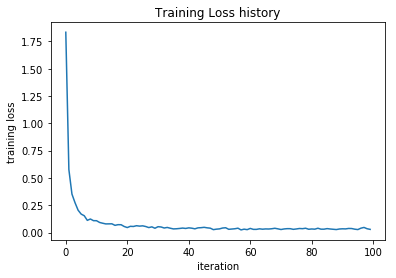

In [8]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [9]:
from data.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = './data/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 15-18%.

In [10]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-5, learning_rate_decay=0.95,
            reg=0.1, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net
test_acc = (subopt_net.predict(X_test) == y_test).mean()
print('Test accuracy (subopt_net): ', test_acc)

iteration 0 / 1000: loss 0.5000623457905098
iteration 100 / 1000: loss 0.4998246529435278
iteration 200 / 1000: loss 0.4995946718475304
iteration 300 / 1000: loss 0.49933536166627984
iteration 400 / 1000: loss 0.4989962372581251
iteration 500 / 1000: loss 0.49847178744773624
iteration 600 / 1000: loss 0.49758927830530253
iteration 700 / 1000: loss 0.4966248113033766
iteration 800 / 1000: loss 0.4958001901438695
iteration 900 / 1000: loss 0.4939583435911163
Validation accuracy:  0.172
Test accuracy (subopt_net):  0.191


In [11]:
stats['train_acc_history']

[0.09, 0.15, 0.225, 0.195, 0.225]

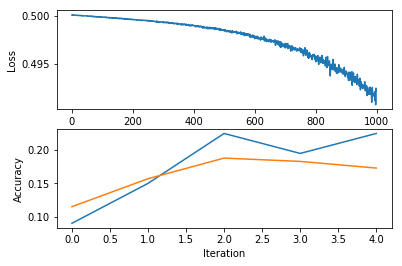

In [12]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.show()

**Questions:**

The training accuracy isn't great. It seems even worse than simple KNN model, which is not as good as expected.

(1) What are some of the reasons why this is the case? Based on previous observations, please provide at least two possible reasons with justification.

(2) How should you fix the problems you identified in (1)?

**Answers:**

<span style="color:blue">
1. There are several potential problems. The first and most obvious one is that we haven't tuned our hyper parameters - we can and need to tune them to make sure the network converges on the best solution it can find. Additionally, the model is very possibly just not complex enough to approximate the truth (this is why modern networks are often quite deep/complex and involve more complicated layers e.g. convolutions)
2. We can tune the hyperparameters (which we will do) or introduce a more sophisticated network architecture by adding more hidden layers, adding more neurons in the hidden layers, or making different kinds of layers.
</span>

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net. To get the full credit of the neural nets, you should get at least **45%** accuracy on validation set. 

**Reminder: Think about whether you should retrain a new model from scratch every time your try a new set of hyperparameters. **

In [14]:
best_net = None # store the best model into this 

# ================================================================ #
# START YOUR CODE HERE:
# ================================================================ #
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 45% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 23%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #

# todo: optimal parameter search (you may use grid search by for-loops )
best_valacc = 0
best_params = {}
best_lr = 0.001
best_lr_decay = 1
best_reg_weight = 0.1

num_iters = 2000
batch_size = 1000

params = {
    'Learning Rate': [
        0.1,
        0.01,
        0.001
    ],
    'Learning Rate Decay': [
        1,
        0.995,
        0.99,
        0.985,
        0.98
    ],
    'Regularizer Weight': [
        0.1,
        0.075,
        0.05,
        0.025
    ]
}

def run_params(learning_rate, learning_rate_decay, reg):
    global best_valacc, best_net, best_params
    print(f'Training and testing {[learning_rate, learning_rate_decay, reg]}')
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    net.train(X_train, y_train, X_val, y_val,
        num_iters=num_iters,
        batch_size=batch_size,
        learning_rate=learning_rate,
        learning_rate_decay=learning_rate_decay,
        reg=reg,
        verbose=False)

    acc = np.mean(net.predict(X_val) == y_val)
    print(f'Accuracy: {acc}\n')
    if acc > best_valacc:
        best_valacc = acc
        best_net = net
        best_params = {
            'Iterations': num_iters,
            'Batch Size': batch_size,
            'Learning Rate': learning_rate,
            'Learning Rate Decay': learning_rate_decay,
            'Regularizer Weight': reg 
        }

def dfs(params_list, params=[]):
    if not params_list:
        run_params(*params)
        return
    
    param_values = params_list[0]
    for val in param_values:
        params.append(val)
        dfs(params_list[1:], params)
        params.pop()

dfs(list(params.values()))

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
# Output your results
print("== Best parameter settings ==")
for k, v in best_params.items():
    print(f'{k} = {v}')
print("Best accuracy on validation set: {}".format(best_valacc))

Training and testing [0.1, 1, 0.1]
Accuracy: 0.087

Training and testing [0.1, 1, 0.075]
Accuracy: 0.087

Training and testing [0.1, 1, 0.05]
Accuracy: 0.087

Training and testing [0.1, 1, 0.025]
Accuracy: 0.087

Training and testing [0.1, 0.995, 0.1]
Accuracy: 0.087

Training and testing [0.1, 0.995, 0.075]
Accuracy: 0.087

Training and testing [0.1, 0.995, 0.05]
Accuracy: 0.087

Training and testing [0.1, 0.995, 0.025]
Accuracy: 0.087

Training and testing [0.1, 0.99, 0.1]
Accuracy: 0.087

Training and testing [0.1, 0.99, 0.075]
Accuracy: 0.087

Training and testing [0.1, 0.99, 0.05]
Accuracy: 0.087

Training and testing [0.1, 0.99, 0.025]
Accuracy: 0.087

Training and testing [0.1, 0.985, 0.1]
Accuracy: 0.087

Training and testing [0.1, 0.985, 0.075]
Accuracy: 0.087

Training and testing [0.1, 0.985, 0.05]
Accuracy: 0.087

Training and testing [0.1, 0.985, 0.025]
Accuracy: 0.087

Training and testing [0.1, 0.98, 0.1]
Accuracy: 0.087

Training and testing [0.1, 0.98, 0.075]
Accuracy:

**Quesions**

(1) What is your best parameter settings? (Output from the previous cell)

(2) What parameters did you tune? How are they changing the performance of nerural network? You can discuss any observations from the optimization.

**Answers**

<span style="color:blue">
1. 2000 iterations, batch size of 1000, learning rate of 0.001, learning rate decay of 0.995, regularizer weight of 0.025<br>
2. I tuned learning rate, learning rate decay, and regularization weight. Learning rate tuning will help make sure the network converges quickly enough, yet is stable enough to converge on an optimal solution instead of skipping over the optimal solution. Learning rate decay plays into this similary; by decaying the learning rate, the model makes bigger adjustments at first but towards the end makes only very small movements, trying to converge on the solution. <br> Regularization aims to prevent overfitting for a noisy dataset, but too high a reg weight will cause the model to underfit (by simply fitting to minimize the regularization penalty). <br> I chose not to modify some characteristics like batch size and iteration number because I did not want to have too large a grid to search. Additionally, I didn't change the number of iterations because I would try to prevent overfitting due to a long training period via Early Stopping or by picking the lowest validation error model trained during the iterations. I also didn't change batch size because I believed I chose a batch size large enough to avoid highly stochastic/random behavior yet small enough to allow the training to run fairly quickly. <br><br> If I had access to more resources, could run it on GPU, and had more time I probably would have also used Early Stopping and selected a larger batch size; however, I obviously could not use those tools.
</span>

---

## Visualize the weights of your neural networks

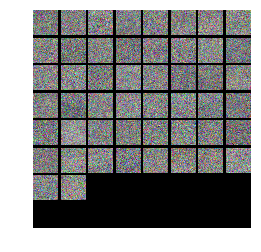

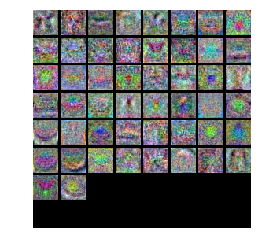

In [15]:
from data.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

**Questions:**

What differences do you see in the weights between the suboptimal net and the best net you arrived at? What do the weights in neural networks probably learn after training?

**Answer:**

<span style="color:blue">
The suboptimal net weights look very arbitrary, while the trained net clearly is figuring things out about phsyical locality and starting to make "blobs", indicating that it is looking for patterns and chunks to be similar.
</span>

---

## Evaluate on test set 

In [16]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy (best_net): ', test_acc)

Test accuracy (best_net):  0.484


**Questions:**

(1) What is your test accuracy by using the best NN you have got? How much does the performance increase compared with kNN? Why can neural networks perform better than kNN?

(2) Do you have any other ideas or suggestions to further improve the performance of neural networks other than the parameters you have tried in the homework? 

**Answers:**

<span style="color:blue">
1. Test accuracy for my best net was 0.484, which is an improvement of over 0.2. One of the best things about neural networks is their far better ability to inference on unseen data than KNN; KNN tends to be very poor at inferencing on data that is dissimilar to the training data (it does a poor job extrapolating to new, different data). Additionally, the network may simply be able to capture more nuance without needing as much training data; with good enough training data, KNN may be able to have a low K value and fit the true distribution very closely but without that, KNN is forced to use a fairly high K to avoid overfitting.
2. As I said before, I would change the architecture of the network. Modern image processing networks (and especially image classification networks) are well researched, and the use of convolutional layers (and their related layers such as pooling layers) and a deeper neural network that can fit a more complex function have already shown themselves to be extremely powerful. Once we have a more complicated architecture, we could also train and tune on a more powerful system and potentially leverage GPUs to allow for better hyperparameter tuning.
</span>

---

## Bonus Question: Change MSE Loss to Cross Entropy Loss

This is a bonus question. If you finish this (cross entropy loss) correctly, you will get **up to 10 points** (add up to your HW3 score). 

Note: From grading policy of this course, your maximum points from homework are still 25 out of 100, but you can use the bonus question to make up other deduction of other assignments.

Pass output scores in networks from forward pass into softmax function. The softmax function is defined as,
$$p_j = \sigma(z_j) = \frac{e^{z_j}}{\sum_{c=1}^{C} e^{z_c}}$$
After softmax, the scores can be considered as probability of $j$-th class.

The cross entropy loss is defined as,
$$L = L_{\text{CE}}+L_{reg} = \frac{1}{N}\sum_{i=1}^{N} \log \left(p_{i,j}\right)+ \frac{\lambda}{2} \left(||W_1||^2 + ||W_2||^2 \right)$$

To take derivative of this loss, you will get the gradient as,
$$\frac{\partial L_{\text{CE}}}{\partial o_i} = p_i - y_i $$

More details about multi-class cross entropy loss, please check [http://cs231n.github.io/linear-classify/](http://cs231n.github.io/linear-classify/) and [more explanation](https://deepnotes.io/softmax-crossentropy) about the derivative of cross entropy.

Change the loss from MSE to cross entropy, you only need to change you ```MSE_loss(x,y)``` in ```TwoLayerNet.loss()``` function to ```softmax_loss(x,y)```.

**Now you are free to use any code to show your results of the two-layer networks with newly-implemented cross entropy loss. You can use code from previous cells.**

In [49]:
# Start training your networks and show your results
# ================================================================ #
# START YOUR CODE HERE:
# ================================================================ #
model = TwoLayerNet(input_size, hidden_size, num_classes)

# increased iterations to 3000 since I had more time
model.train(X_train, y_train, X_val, y_val,
    num_iters=3000, batch_size=1000, 
    learning_rate=0.001, learning_rate_decay=0.995,
    reg=0.025, verbose=True)
test_acc = (model.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

iteration 0 / 3000: loss 2.3026152191579814
iteration 100 / 3000: loss 1.9243084193238658
iteration 200 / 3000: loss 1.7594292012159314
iteration 300 / 3000: loss 1.6251066827479497
iteration 400 / 3000: loss 1.5632776043852186
iteration 500 / 3000: loss 1.4781723168914798
iteration 600 / 3000: loss 1.4990366648903883
iteration 700 / 3000: loss 1.4744859951901206
iteration 800 / 3000: loss 1.3807530413926155
iteration 900 / 3000: loss 1.3744581974837389
iteration 1000 / 3000: loss 1.4243201032773842
iteration 1100 / 3000: loss 1.37427244978942
iteration 1200 / 3000: loss 1.3334782587134006
iteration 1300 / 3000: loss 1.3136866751448488
iteration 1400 / 3000: loss 1.3126012277186372
iteration 1500 / 3000: loss 1.253111268512218
iteration 1600 / 3000: loss 1.3105484027011365
iteration 1700 / 3000: loss 1.3177762095192393
iteration 1800 / 3000: loss 1.2851925455240112
iteration 1900 / 3000: loss 1.2255751233352978
iteration 2000 / 3000: loss 1.2841311549893708
iteration 2100 / 3000: loss 

----

## End of Homework 3, Part 2 :)

After you've finished both parts the homework, please print out the both of the entire `ipynb` notebooks and `py` files into one PDF file. Make sure you include the output of code cells and answers for questions. Prepare submit it to GradeScope. Do not include any dataset in your submission.  